# 5.10. Interacting with asynchronous parallel tasks in IPython

In [1]:
import sys
import time
import ipyparallel
import ipywidgets
from IPython.display import clear_output, display

In [2]:
rc = ipyparallel.Client()

In [3]:
view = rc.load_balanced_view()

In [4]:
def f(x):
    import time
    time.sleep(.1)
    return x * x

In [5]:
numbers = list(range(100))

In [6]:
ar = view.map_async(f, numbers)

In [7]:
ar.metadata[0]

{'after': None,
 'completed': None,
 'data': {},
 ...
 'submitted': datetime.datetime(2017, ...)}

In [8]:
for i in ar:
    print(i, end=', ')

0, 1, 4, ..., 9801,


In [9]:
def progress_bar(ar):
    # We create a progress bar.
    w = ipywidgets.IntProgress()
    # The maximum value is the number of tasks.
    w.max = len(ar.msg_ids)
    # We display the widget in the output area.
    display(w)
    # Repeat:
    while not ar.ready():
        # Update the widget's value with the
        # number of tasks that have finished
        # so far.
        w.value = ar.progress
        time.sleep(.1)
    w.value = w.max

In [10]:
ar = view.map_async(f, numbers)

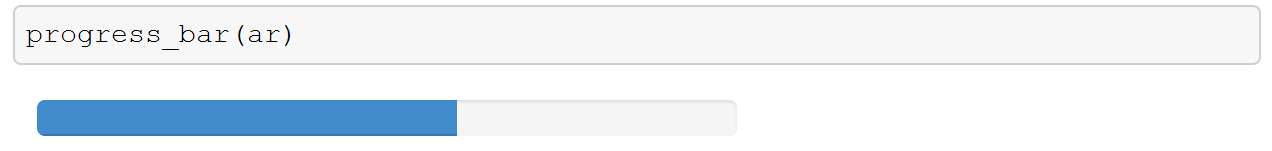

In [11]:
progress_bar(ar)